In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

N_HIDDEN_UNITS = 4

torch.manual_seed(42)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(2, N_HIDDEN_UNITS)
        self.relu1  = nn.ReLU()
        
        self.layer2 = nn.Linear(N_HIDDEN_UNITS, N_HIDDEN_UNITS)
        self.relu2  = nn.ReLU()
        
        self.layer3 = nn.Linear(N_HIDDEN_UNITS, N_HIDDEN_UNITS)
        self.relu3  = nn.ReLU()
        
        self.layer4 = nn.Linear(N_HIDDEN_UNITS, 1)
        
    def forward(self, x):
        ints = []
        out = self.relu1(self.layer1(x))
        ints.append(out)
        
        out = self.relu2(self.layer2(out))
        ints.append(out)
        
        out = self.relu3(self.layer3(out))
        ints.append(out)
        
        return self.layer4(out), ints 
        
net = Net()
data = torch.rand((10,2))

In [6]:
import seaborn as sns

N_LAYERS = 3
pal = sns.color_palette("Paired", N_HIDDEN_UNITS*N_LAYERS)
pal

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

## Investigating individual linear maps

If we take just the first layer, we can investigate the linear regions of each hidden unit like this:

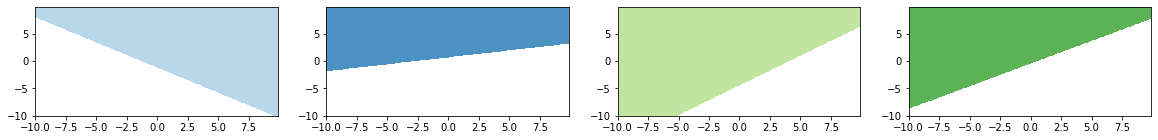

In [7]:
h = 0.1

X, Y = np.arange(-10,10,h), np.arange(-10,10,h)

# cartesian product
data = torch.Tensor(np.transpose([np.tile(X, len(Y)), np.repeat(Y, len(X))]))   
out, ints = net(data)
out = ints[0].detach()

fig, axs = plt.subplots(1,N_HIDDEN_UNITS, figsize=(20,2))
axs = axs.ravel()

for i, ax in enumerate(axs):
    rgba_colors = np.zeros((2,4))
    rgba_colors[:,:3] = pal[i] 
    rgba_colors[:,3] = [0., .8] # alpha values  
    
    Z = np.sign(out[:,i])

    xx, yy = np.meshgrid(X,Y)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx,yy,Z, levels=1, colors=rgba_colors)

<ipython-input-8-27c53893c672>:30: UserWarning: No contour levels were found within the data range.
  ax.contour(xx,yy,Z,colors=rgba_colors)


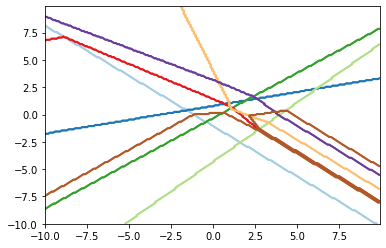

In [8]:
h = 0.1

X, Y = np.arange(-10,10,h), np.arange(-10,10,h)

# cartesian product
data = torch.Tensor(np.transpose([np.tile(X, len(Y)), np.repeat(Y, len(X))]))   
out, ints = net(data)

redness = np.linspace(0,1, N_HIDDEN_UNITS)

fig, ax = plt.subplots()

j=0

for int_ in ints:
    out = int_.detach()
    for i in range(N_HIDDEN_UNITS):
        rgba_colors = np.zeros((2,4)) # on off classes

        rgba_colors[:,0] = pal[j][0]
        rgba_colors[:,1] = pal[j][1]
        rgba_colors[:,2] = pal[j][2]
        rgba_colors[:,3] = [0., 1]    

        Z = np.sign(out[:,i])

        xx, yy = np.meshgrid(X,Y)
        Z = Z.reshape(xx.shape)

        ax.contour(xx,yy,Z,colors=rgba_colors)
        j += 1
        